# Занятие 7

#  Классификация задач машинного обучения. Метрики для оценки качества моделей. Линейная и логистическая регрессии.

Постановка задачи машинного обучения. Обучение с учителем, обучение без учителя, Reinforcement learning.  
Метрики для оценки качества решения задач регрессии (MSE, RMSE, MAE, MAPE и др.). Метрики для оценки качества моделей классификации (accuracy, precision, recall, F1-score, AUC ROC). Метрики для оценки качества кластеризации.

Линейная регрессия. Логистическая регрессия. Проблемы машинного обучения (переобучение, отбор признаков, дисбаланс классов). Регуляризация (L1, L2, эластичная сеть).


В машинном обучении выделяют следующие основные виды машинного обучения: обучение с учителем (supervised learning), обучение без учителя (unsupervised learning) и обучение с подкреплением (reinforcement learning).

При **обучении с учителем** есть размеченные данные, т. е. пары признаки объекта-предсказываемое значение (таргет).

Рассмотрим пример. Допустим у нас есть данные о недвижимости: площадь, этаж, район, наличие или отсутствие парковки у дома, расстояние от метро, цена квартиры и т. п. Требуется построить модель, которая будет предсказывать рыночную стоимость квартиры по её параметрам. Это пример машинного обучения с учителем: у нас есть исходные данные (количество квартир и их свойства, которые называются признаками) и готовый ответ по каждой из квартир – её стоимость. Это пример задачи регрессии. Другие примеры: подтвердить или опровергнуть наличие рака у пациента, зная все его медицинские показатели, выяснить, является ли входящее письмо спамом, проанализировав его текст. Это примеры задач класссификации.

В случае **обучения без учителя**, когда готовых «правильных ответов» системе не предоставлено, всё обстоит ещё интереснее. Например, у нас есть информация о весе и росте какого-то количества людей, и эти данные нужно распределить по трём группам, для каждой из которых предстоит пошить рубашки подходящих размеров. Это задача кластеризации. В этом случае предстоит разделить все данные на 3 кластера (но, как правило, такого строгого и единственно возможного деления нет).

Если взять другую ситуацию, когда каждый из объектов в выборке обладает сотней различных признаков, то основной трудностью будет графическое отображение такой выборки. Поэтому количество признаков уменьшают до двух или трёх, и становится возможным визуализировать их на плоскости или в 3D. Это – задача уменьшения размерности.

**Обучение с подкреплением (англ. reinforcement learning)** — один из способов машинного обучения, в ходе которого испытуемая система (агент) обучается, взаимодействуя с некоторой средой. Откликом среды (а не специальной системы управления подкреплением, как это происходит в обучении с учителем) на принятые решения являются сигналы подкрепления, поэтому такое обучение является частным случаем обучения с учителем, но учителем является среда или её модель.


## Линейная регрессия

Регрессионная модель задаётся уравнением:

$y=f(x,b)+\varepsilon, ~E(\varepsilon)$,

где $b$ — параметры модели, $\varepsilon$ — случайная ошибка модели; называется линейной регрессией, если функция регрессии $f(x,b)$ имеет вид:

$f(x,b)=b_0+b_1 x_1+b_2 x_2+...+b_k x_k$,

где $b_j$ — параметры (коэффициенты) регрессии, $x_j$ — регрессоры (факторы модели), ''k'' — количество факторов модели.

Коэффициенты линейной регрессии показывают скорость изменения зависимой переменной по данному фактору, при фиксированных остальных факторах (в линейной модели эта скорость постоянна):

$\forall j  \quad  ~b_j=\frac {\partial f}{\partial x_j}=const$

Параметр $b_0$, при котором нет факторов, называют часто ''константой''. Формально — это значение функции при нулевом значении всех факторов. Для аналитических целей удобно считать, что константа — это параметр при «факторе», равном 1 (или другой произвольной постоянной, поэтому константой называют также и этот «фактор»). В таком случае, если перенумеровать факторы и параметры исходной модели с учетом этого (оставив обозначение общего количества факторов — k), то линейную функцию регрессии можно записать в следующем виде, формально не содержащем константу:

$f(x,b)=b_1 x_1 + b_2 x_2 + \ldots + b_k x_k=\sum^k_{j=1}b_j x_j=x^Tb$,

где $x^T=(x_1,x_2,...,x_k)$ — вектор регрессоров, $b=(b_1,b_2, \ldots,b_k)^T$ — вектор-столбец параметров (коэффициентов).

Линейная модель может быть как с константой, так и без константы. Тогда в этом представлении первый фактор либо равен единице, либо является обычным фактором соответственно.

### Парная и множественная регрессия

В частном случае, когда фактор единственный (без учёта константы), говорят о ''парной'' или ''простейшей'' линейной регрессии:

$y_t=a+b x_t+\varepsilon_t$

Когда количество факторов (без учёта константы) больше одного, то говорят о ''множественной'' регрессии:

$Y = b_0 + b_1 x_{i1} + ... + b_j x_{ij} + ... + b_k x_{ik} + e_i$



### Матричное представление

Пусть дана выборка объёмом n наблюдений переменных $y$ и $x$. Обозначим $t$ — номер наблюдения в выборке. Тогда $y_t$ — значение переменной $y$ в $t$-м наблюдении, $x_{tj}$ — значение $j$-го фактора в $t$-м наблюдении. Соответственно, $x^T_t=(x_{t1},x_{t2},...,x_{tk})$ — вектор регрессоров в ''t''-м наблюдении. Тогда линейная регрессионная зависимость имеет место в каждом наблюдении:

$y_t=b_1 x_{t1}+b_2 x_{t2}+...+b_k x_{tk}=\sum^k_{j=1}b_j x_{tj}=x^T_t b+\varepsilon_t~,~E(\varepsilon_t)=0~,~t=1..n$

Введём обозначения:

$y=
\begin{pmatrix}
y_{1}\\
y_{2}\\
...\\
y_{n}\\
\end{pmatrix}$ — вектор наблюдений зависимой переменой $y$

$X=
\begin{pmatrix}
x_{11}&x_{12}& ...& x_{1k}\\
x_{21}&x_{22}& ...& x_{2k}\\
...\\
x_{n1}& x_{n2}& ...&x_{nk}\\
\end{pmatrix}$ — матрица факторов.

$\varepsilon=
\begin{pmatrix}
\varepsilon_{1}\\
\varepsilon_{2}\\
...\\
\varepsilon_{n}\\
\end{pmatrix}$ — вектор случайных ошибок.

Тогда модель линейной регрессии можно представить в матричной форме:

$y=Xb+\varepsilon$

Для подбора параметров линейной регрессии используется метод наименьших квадратов и метод градиентного спуска.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

Загрузим данные по автомобилям: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2]:
df = pd.read_csv('./car_data.csv')

Посмотрим общую информацию о датафрейме.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df['Car_Name'].nunique()

98

В силу большого числа категорий, скорее всего, это будет неинформативный признак, поэтому удаляем этот признак.

In [5]:
df.drop('Car_Name', axis=1, inplace=True)

Добавим вместо столбца с годом выпуска "возраст" автомобиля.

In [6]:
df.insert(0, "Age", df["Year"].max()+1-df["Year"] )
df.drop('Year', axis=1, inplace=True)

Проанализируем выбросы в данных.

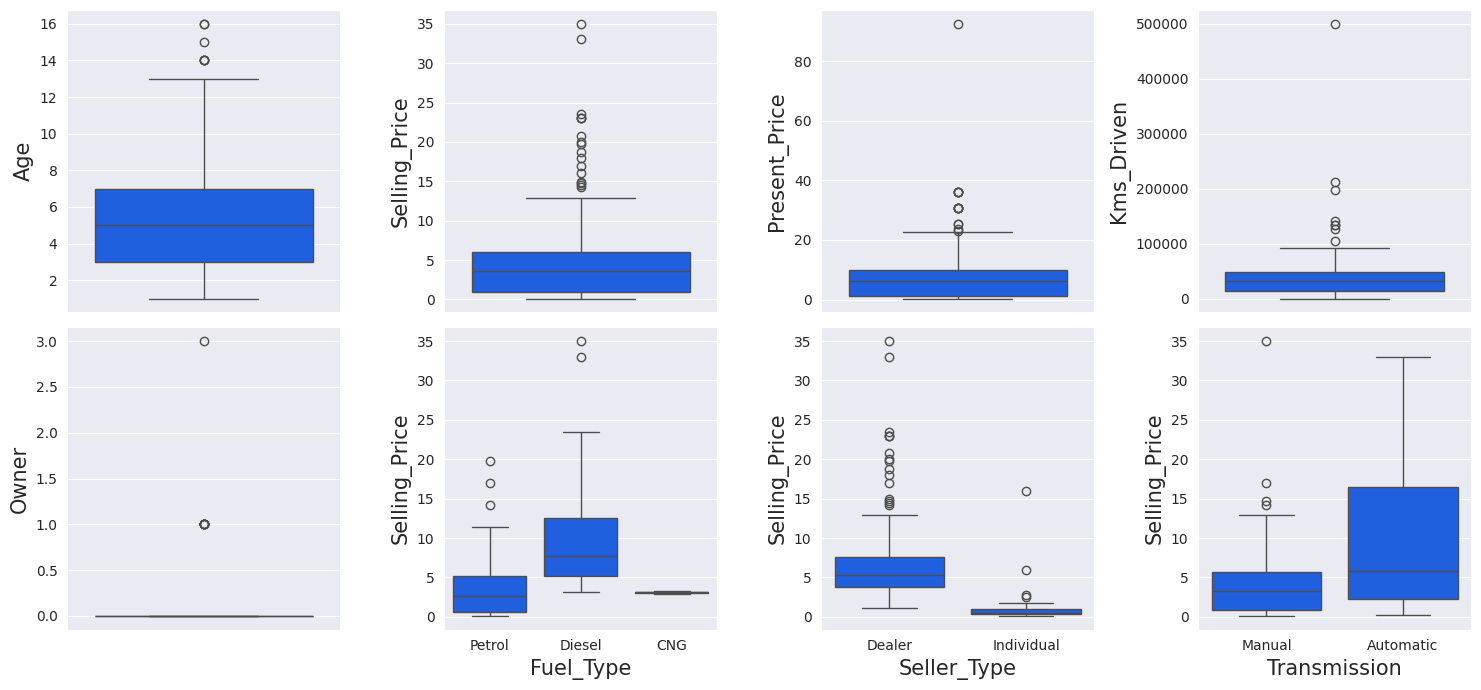

In [7]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [8]:
outliers_indexes = []
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


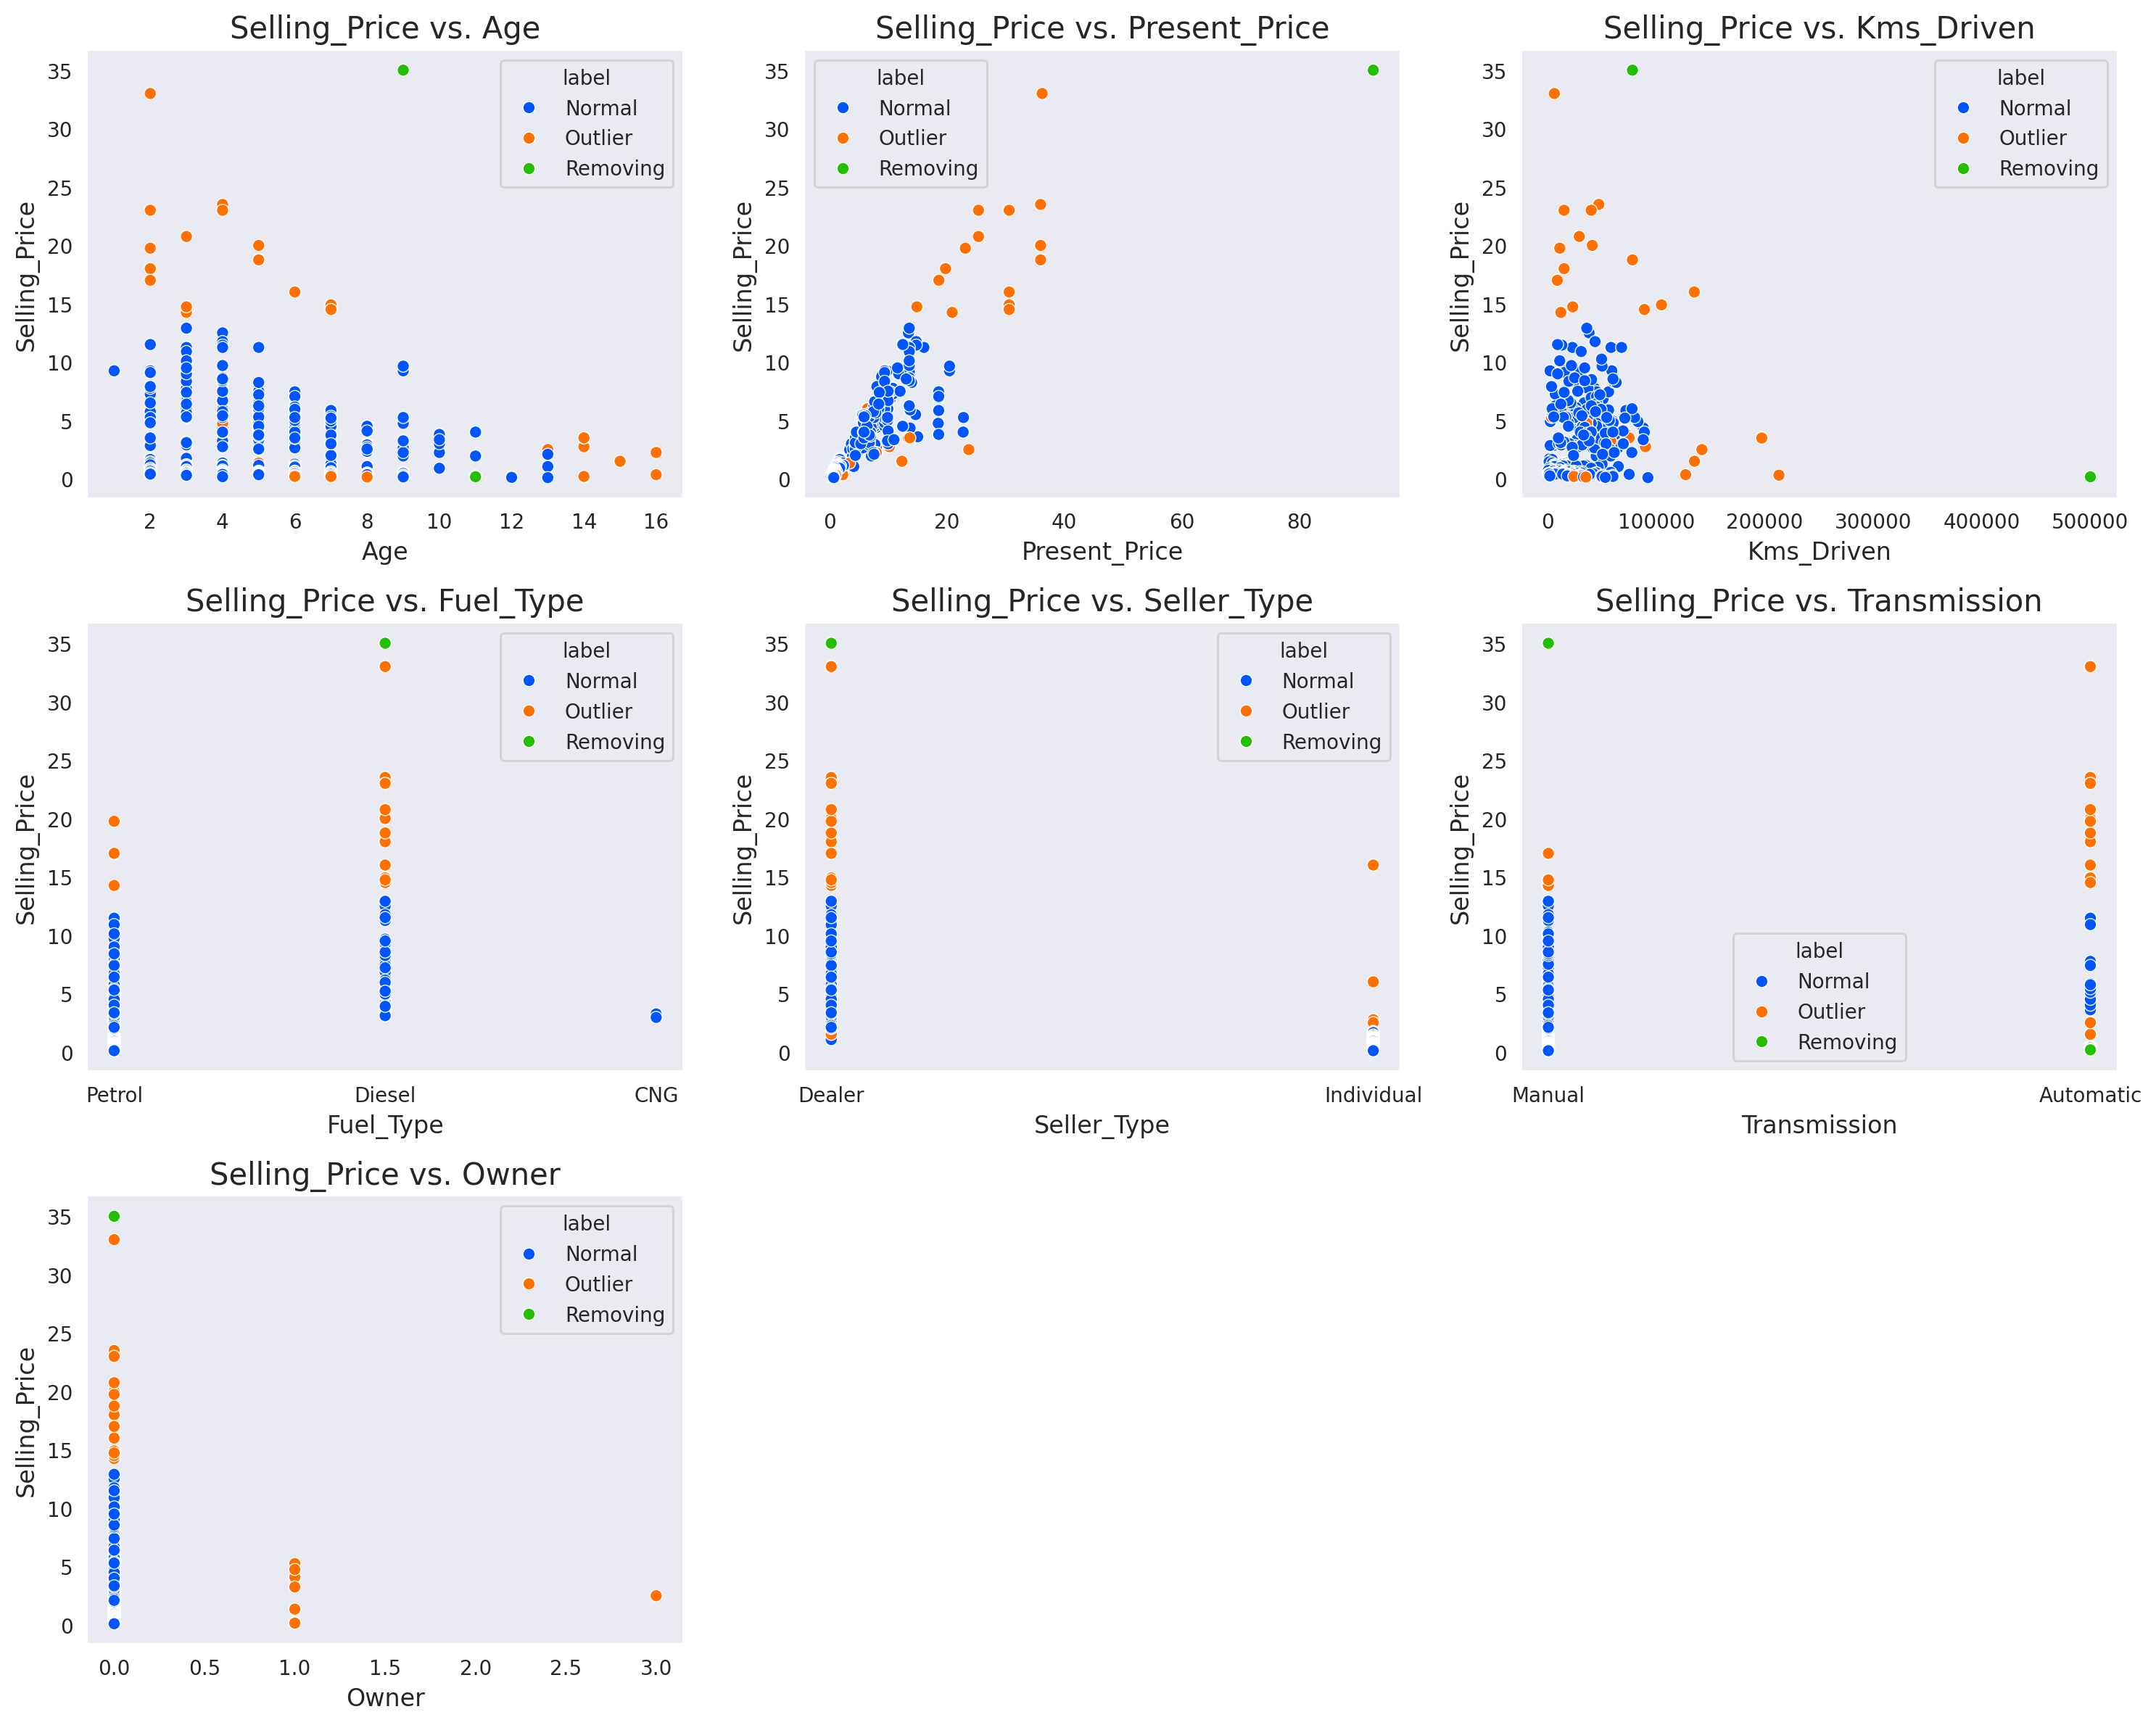

In [9]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [10]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

Проверим наличие пропусков:

In [11]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

Разделим признаки на категориальные и числовые.

In [13]:
NumCols = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

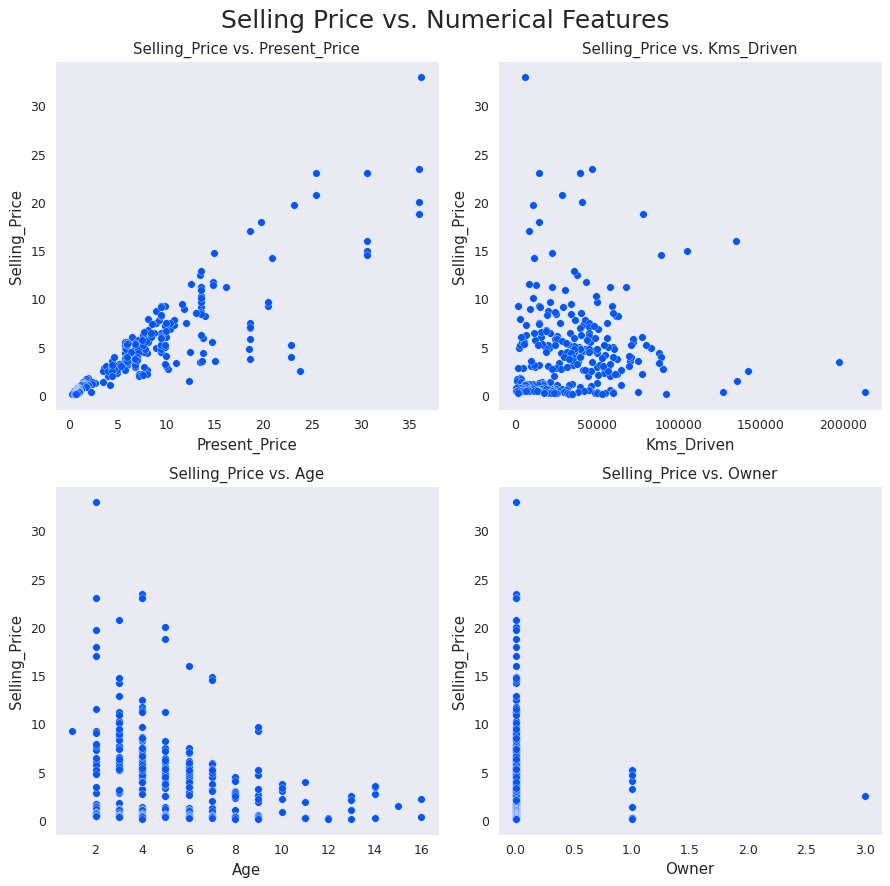

In [14]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

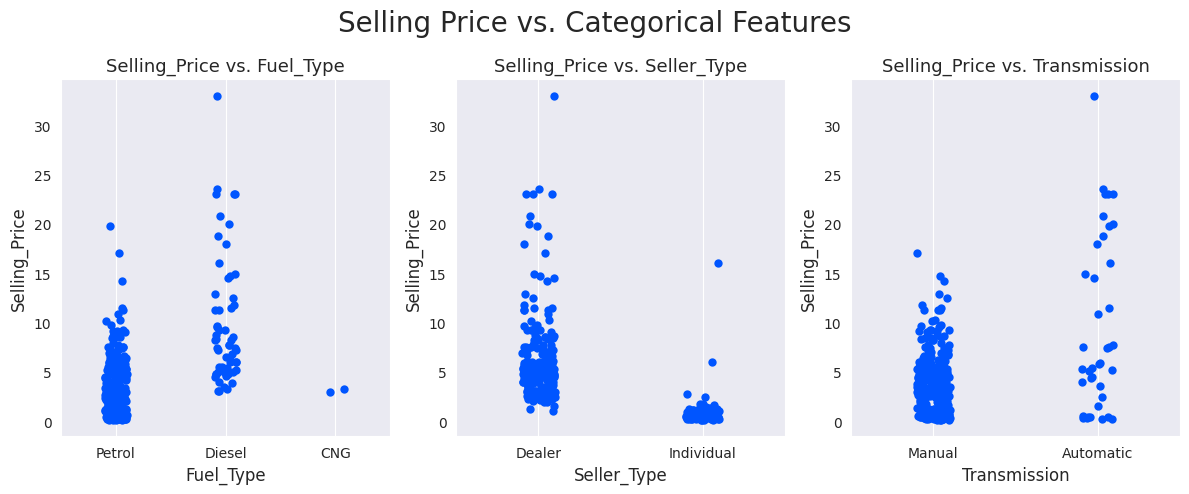

In [15]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

По итогам анализа данных можно сделать следующие выводы:
    
* По мере роста текущей цены растет и цена продажи. Наблюдается положительная линейная корреляция.

* Цена продажи обратно пропорциональна пройденным километрам.

* Цена продажи обратно пропорциональна возрасту автомобиля.

* По мере увеличения числа предыдущих владельцев автомобиля его продажная цена снижается. Таким образом, цена продажи обратно пропорциональна владельцу.
Дизельные автомобили > автомобили с КПГ > бензиновые автомобили с точки зрения цены продажи.

* Продажная цена автомобилей, продаваемых физическими лицами, ниже цены автомобилей, продаваемых дилерами.

* Автоматические автомобили стоят дороже, чем ручные.

In [16]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


Построим матрицу корреляций

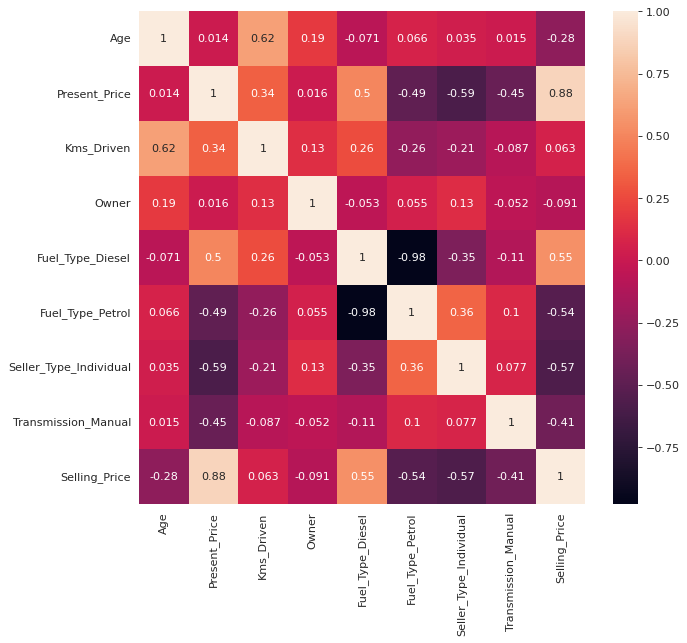

In [17]:
target = 'Selling_Price'
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True)
plt.show()

Выделяем нецелевые признаки (фичи) и таргет.

In [18]:
X = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
y_test_actual = y_test

Масштабирование данных выполняется после разделения выборок для того, чтобы не было "утечки" признаков.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучаем модель линейной регрессии с гиперпараметрами по умолчанию. Гиперпараметры модели — параметры, значения которых задается до начала обучения модели и не изменяется в процессе обучения.

In [22]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,4.302488
Present_Price Coef.,3.492729
Fuel_Type_Diesel Coef.,0.850217
Fuel_Type_Petrol Coef.,0.207319
Transmission_Manual Coef.,0.027375
Owner Coef.,-0.232722
Seller_Type_Individual Coef.,-0.377334
Kms_Driven Coef.,-0.589672
Age Coef.,-0.936339


In [24]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


Подробнее по метрикам можно посмотреть: https://loginom.ru/blog/quality-metrics

## Логистическая регрессия

Логистическая регрессия – это тип регрессии, в которой мы оцениваем наличие связи между бинарной зависимой переменной и одной или несколькими независимыми переменными. Практическое значение логистической регрессии заключается в том, что она является мощным статистическим методом предсказания событий, который включает в себя одну или несколько независимых переменных.

Примеры:

* кредитный скоринг;
* замеры успешности проводимых рекламных кампаний;
* прогноз оттока клиентов;
* оценка вероятности землетрясения в конкретную дату.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Загрузим датасет с ирисами.

In [26]:
iris = datasets.load_iris()

Разделим данные на фичи и таргет:

In [27]:
X = iris.data
y = iris.target

Разделим данные на обучающую и тестовую выборки с соотношении 70 % составляет обучающая часть выборки, а 30 % - тестовая часть выборки.

В лучае подбора шиперпараметров модели необходимо разделение на обучающую, валидационную и тестовую выборки (или можно использовать кросс-валидацию, которая будет далее раассмотрена).

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Выполним обучение модели

In [29]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model = clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9555555555555556

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Практические задания

1. Напишите собственные классы для линейной и логистической регрессии. В классох должны быть метод train (обучение модели), predict (получение прогноза модели) и evaluate (оценка качества модели).

Для линейной  регрессии качество модели оценивается по метрикам: MAE, MSE, RMSE, MAPE и SMAPE (см. статью по метрикам https://loginom.ru/blog/quality-metrics).

Для логистической регрессии рассчитываются метрики: accuracy, precision, recall и f1-score (см. статью https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)

In [61]:
class myLinearRegression:

    def __init__(self, learning_rate=0.01, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def evaluate(self, y_true, y_pred):
        mae = np.mean(np.abs(y_true - y_pred))
        mse = np.mean((y_true - y_pred) ** 2)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

        return mae, mse, rmse, mape, smape

In [62]:
class myLogisticRegression:

    def __init__(self, learning_rate=0.01, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return y_predicted

    def evaluate(self, y_true, y_pred):
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)

        accuracy = np.mean(y_true == y_pred_class)
        precision = np.sum((y_true == 1) & (y_pred_class == 1)) / np.sum(y_pred_class == 1)
        recall = np.sum((y_true == 1) & (y_pred_class == 1)) / np.sum(y_true == 1)
        f1_score = 2 * precision * recall / (precision + recall)

        return accuracy, precision, recall, f1_score

2. Используя данные по медицинским страховкам (https://www.kaggle.com/datasets/mirichoi0218/insurance) предобработайте данные, проанализируйте данные и обучите модель линейной регрессии. Сравните результаты полученные с использованием собственноручно написанной линейной регрессией и моделью из sklearn.

In [34]:
df = pd.read_csv('insurance.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


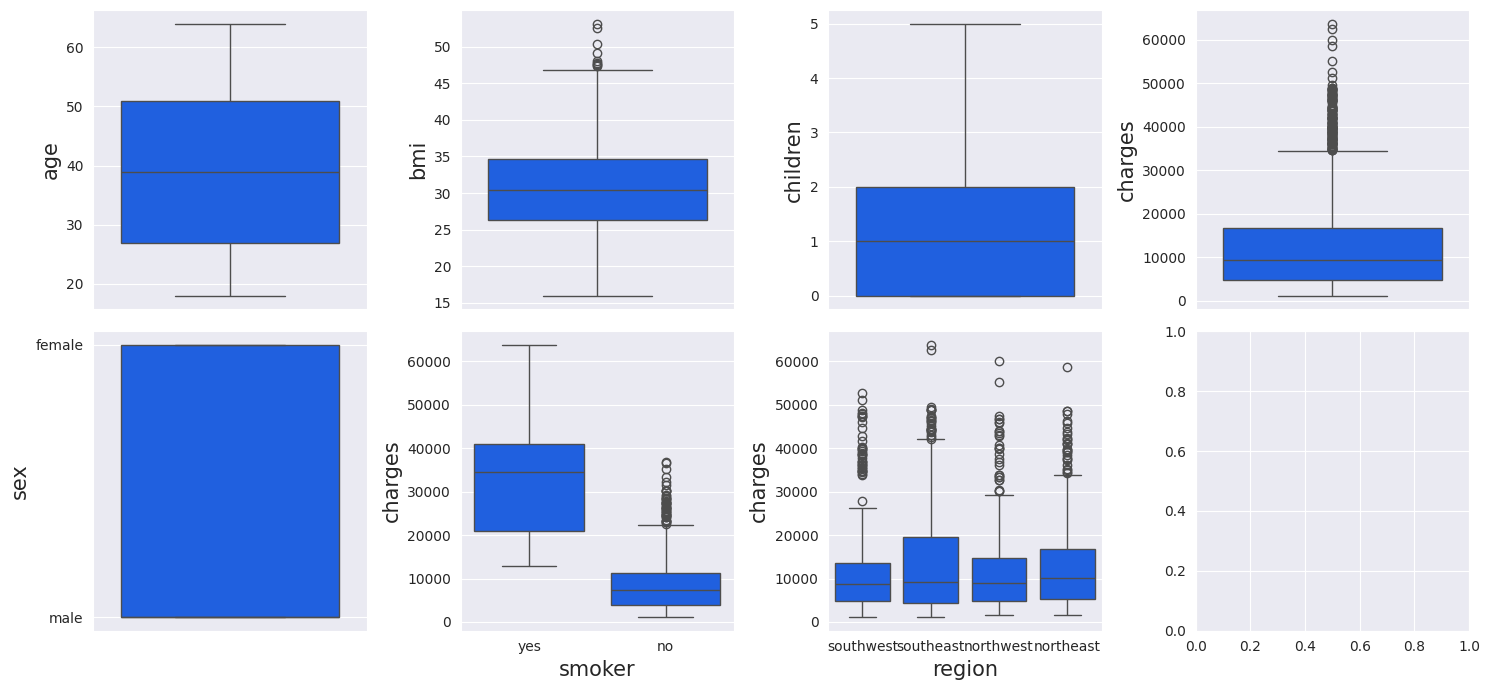

In [37]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,  df.select_dtypes(include='object').columns.values])

fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4
    if i<5:
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='charges', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [38]:
outliers_indexes = []
target = 'charges'

for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = df[(df[col] < minimum) | (df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

203 outliers were identified, whose indices are:

[516, 1031, 520, 9, 524, 1037, 526, 1039, 14, 1036, 530, 19, 23, 1047, 1049, 539, 29, 30, 543, 34, 549, 1062, 39, 38, 558, 1070, 49, 53, 1078, 55, 569, 573, 62, 1088, 577, 1090, 1093, 1096, 1098, 587, 82, 84, 86, 599, 1111, 1117, 94, 1118, 1120, 609, 1122, 1124, 103, 615, 618, 109, 621, 623, 1139, 115, 629, 1142, 116, 1146, 123, 637, 128, 1152, 641, 1156, 138, 140, 146, 658, 665, 667, 668, 158, 161, 674, 1186, 677, 682, 1196, 175, 688, 689, 1206, 1207, 696, 185, 697, 1211, 706, 1218, 203, 1230, 725, 1240, 1241, 219, 223, 736, 1249, 738, 739, 227, 742, 1258, 240, 242, 1267, 244, 245, 759, 251, 252, 254, 256, 770, 259, 1284, 263, 1288, 265, 1291, 271, 1300, 1301, 1303, 281, 1308, 286, 288, 1313, 289, 803, 292, 1317, 806, 298, 1323, 819, 312, 1337, 314, 826, 828, 321, 322, 327, 328, 330, 842, 845, 847, 850, 338, 852, 856, 860, 355, 876, 883, 373, 377, 890, 379, 381, 893, 387, 901, 401, 917, 925, 419, 420, 421, 422, 936, 430, 947, 951, 441,

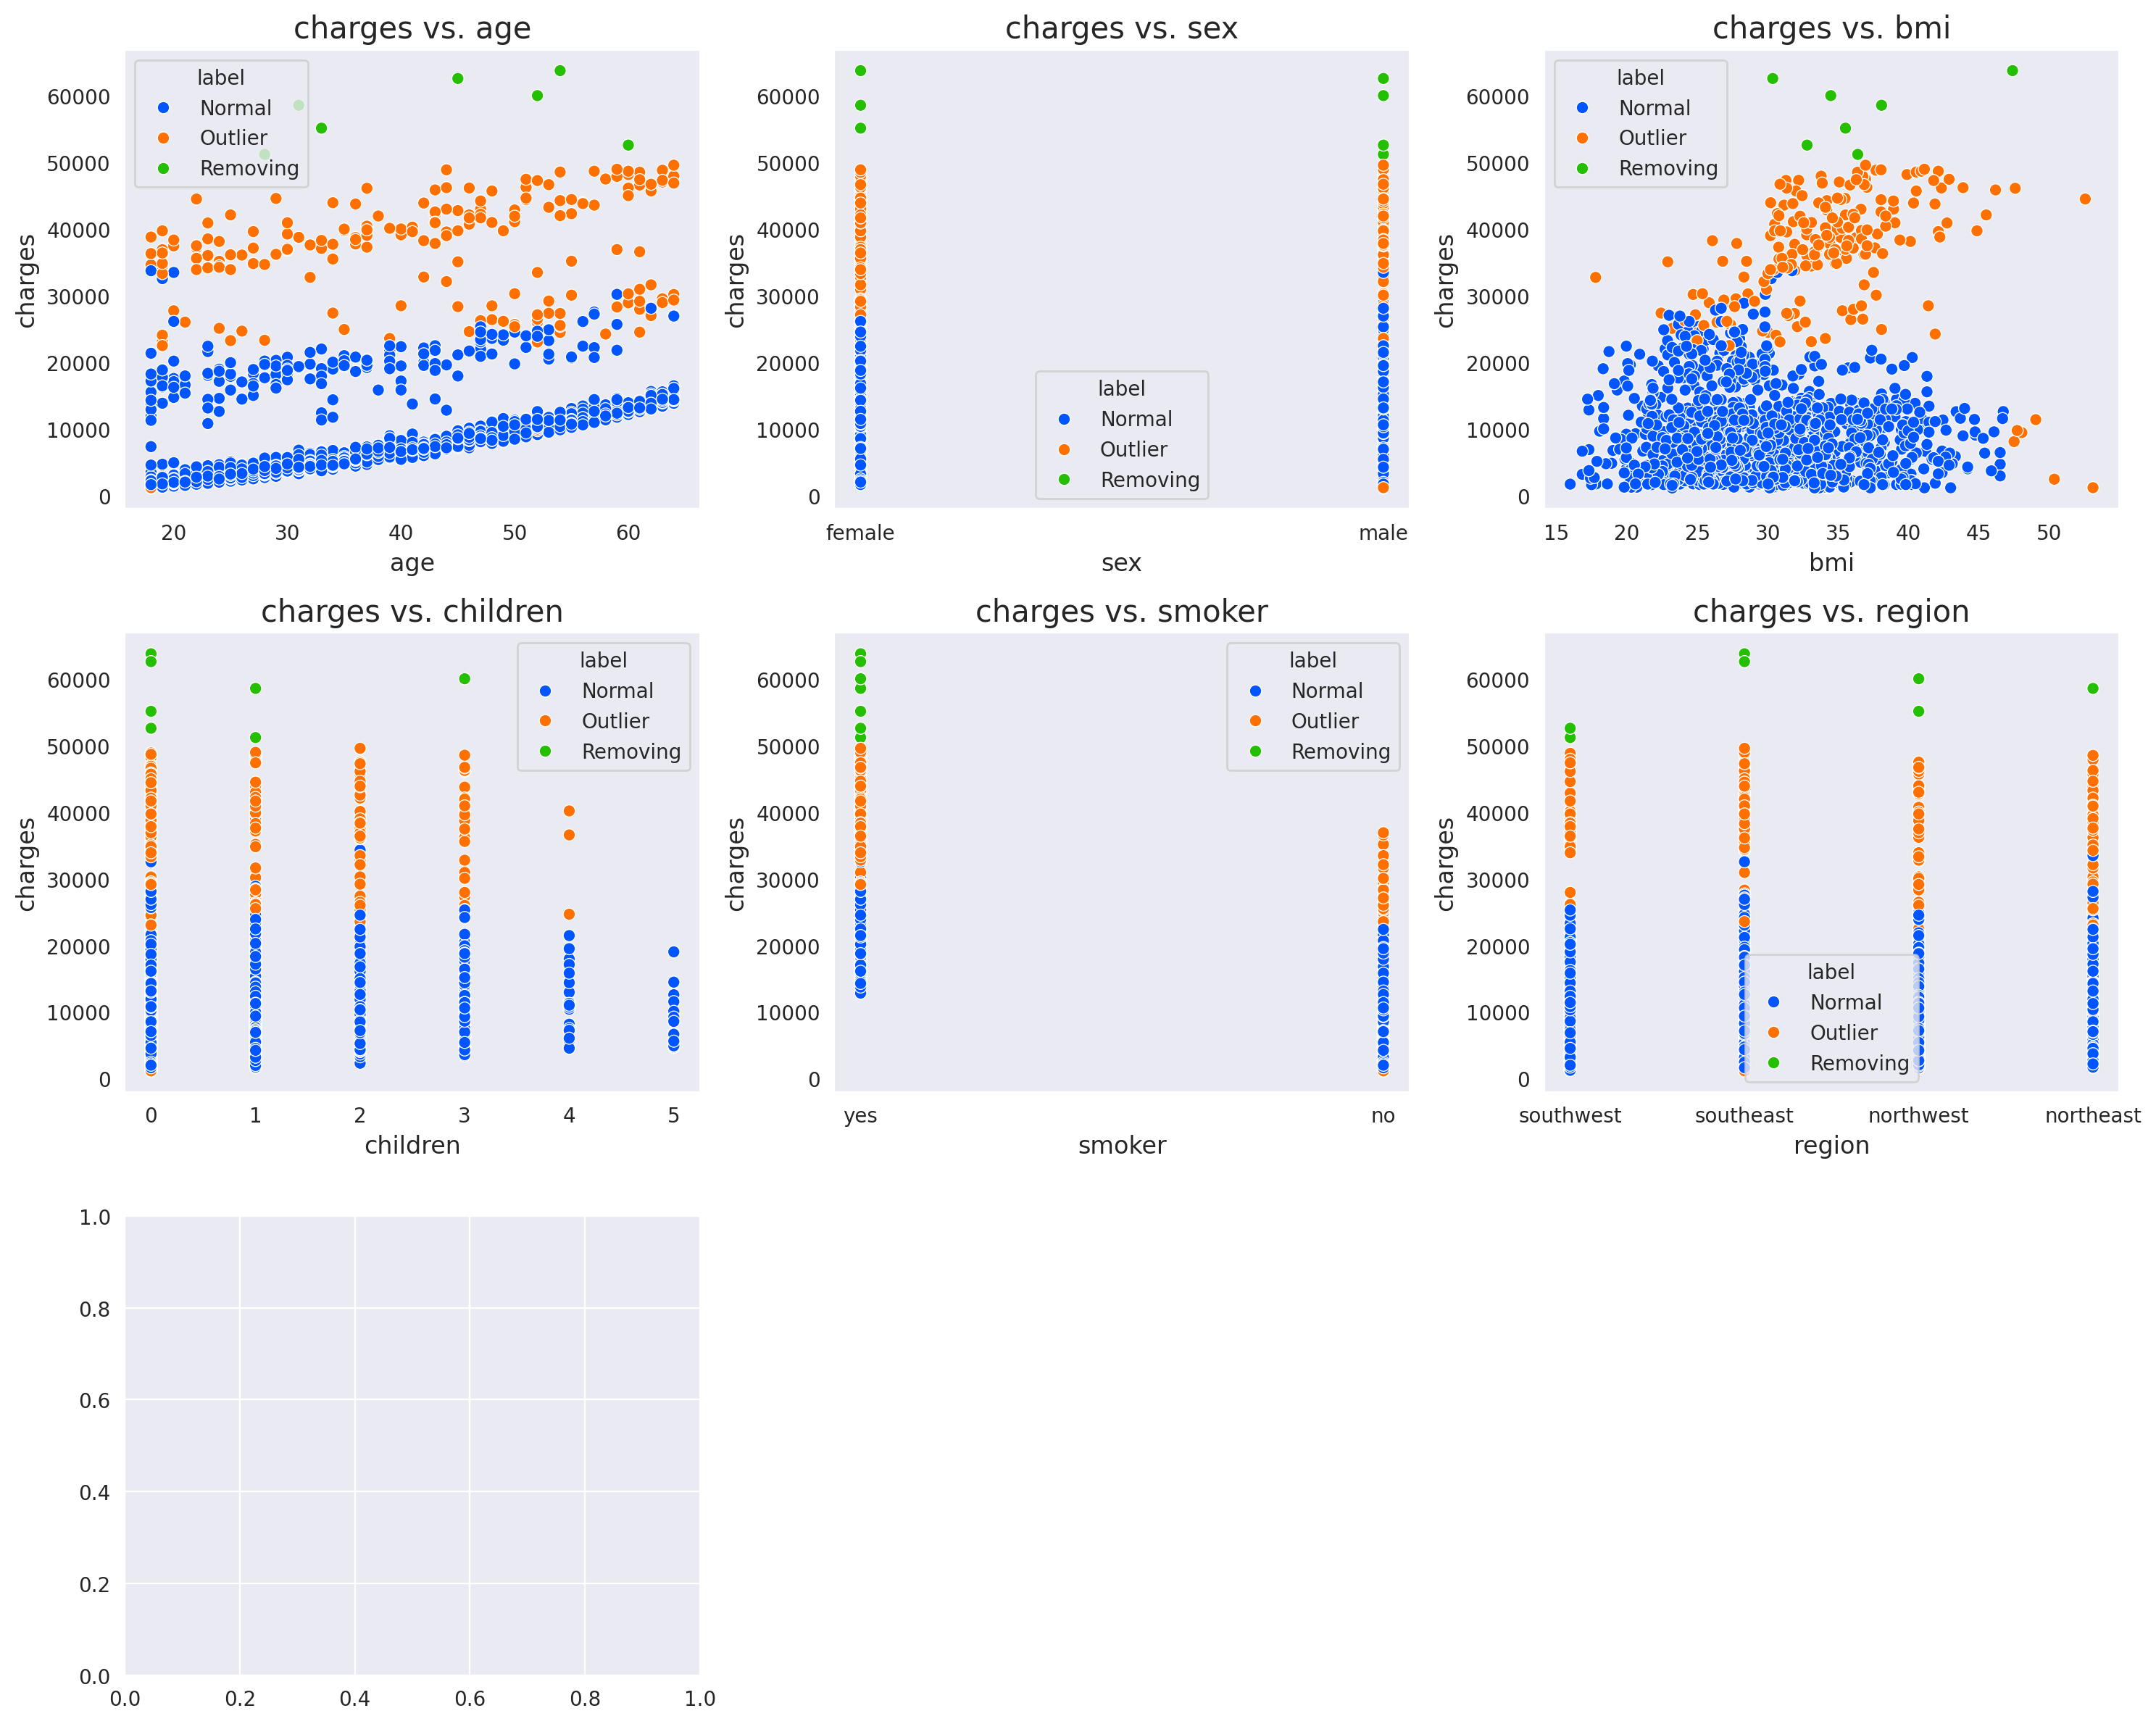

In [41]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>50000].index)
df1.loc[removing_indexes,'label'] = 'Removing'

# Plot
target = 'charges'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()

In [42]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[577, 34, 1230, 819, 1300, 1146, 543]

In [43]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.9+ KB


In [46]:
NumCols = ['age', 'bmi', 'children', 'charges']
CatCols = ['sex', 'smoker', 'region']

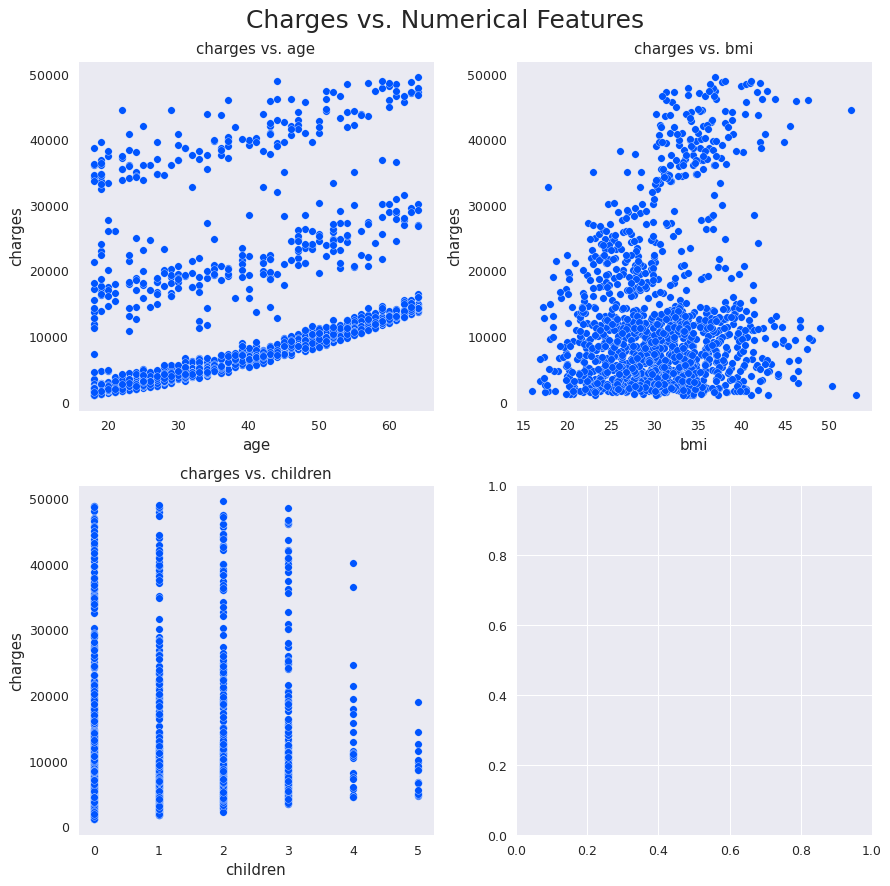

In [47]:
fig, ax = plt.subplots(nrows=2 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ['age', 'bmi', 'children']
target = 'charges'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Charges vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

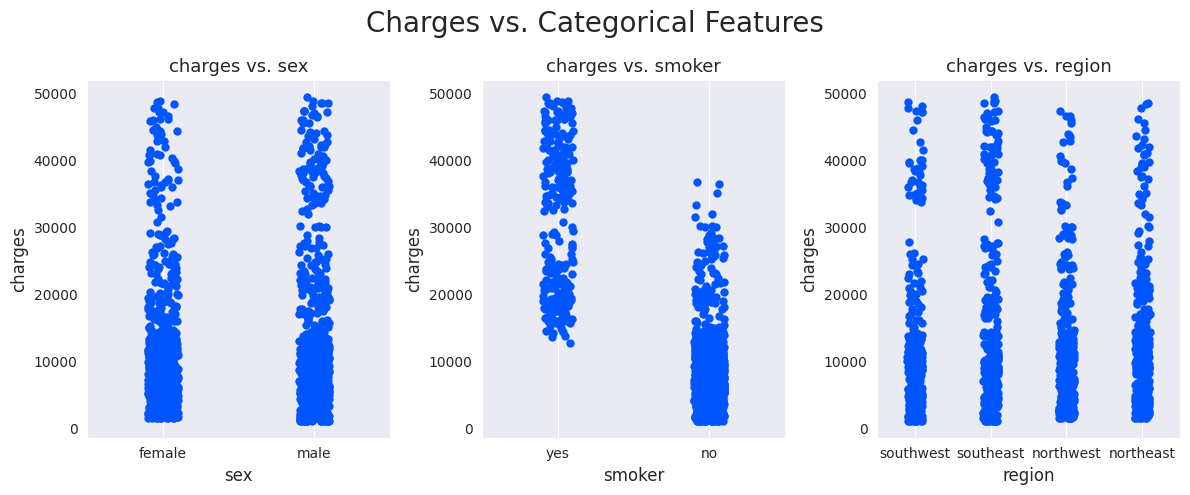

In [48]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
cat_features = ['sex', 'smoker', 'region']
target = 'charges'
c = '#0055ff'

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    axes[i].set_xlabel(cat_features[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Charges vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

In [54]:
CatCols = ['sex', 'smoker', 'region']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


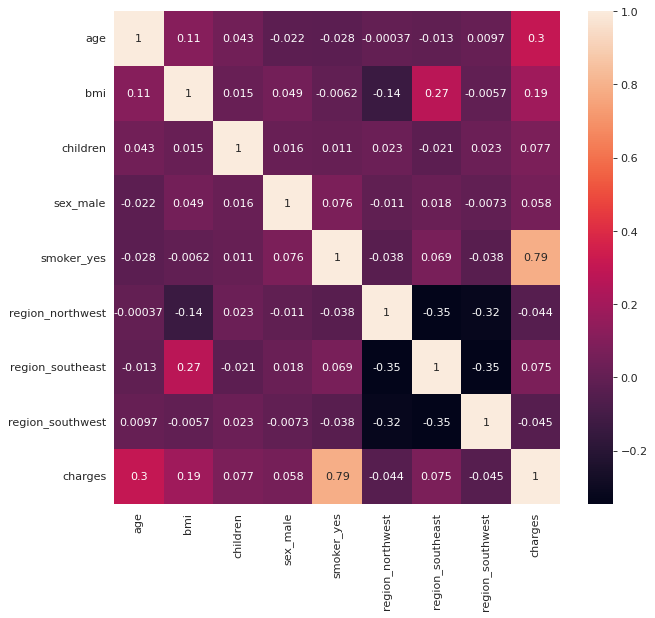

In [55]:
target = 'charges'
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(), annot=True)
plt.show()

In [56]:
X = df1.drop('charges', axis=1)
y = df1['charges']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
y_test_actual = y_test

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [66]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_), index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,12866.329493
smoker_yes Coef.,9184.431027
age Coef.,3400.516302
bmi Coef.,1812.518706
children Coef.,439.125364
sex_male Coef.,-3.209251
region_northwest Coef.,-143.457098
region_southwest Coef.,-350.727741
region_southeast Coef.,-435.105966


In [67]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,4.138737e+03
MSE,3.481216e+07
RMSE,5.900183e+03
R2-Score,7.708655e-01


In [68]:
my_linear_reg = myLinearRegression()

In [69]:
my_linear_reg.train(X, y)

In [72]:
print(my_linear_reg.predict(X))

[-1.38566424e+144 -1.50298894e+144 -1.83548517e+144 ... -1.58097922e+144
 -1.40151662e+144 -2.88786939e+144]


In [74]:
y_pred = my_linear_reg.predict(X)
mae, mse, rmse, mape, smape = my_linear_reg.evaluate(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape)

MAE: 2.164586388854187e+144
MSE: 4.969383955650825e+288
RMSE: 2.2292115098506973e+144
MAPE: 3.1569928885382014e+142
SMAPE: 200.0


3. Используя данные по сердечным заболеваниям (https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression) предобработайте данные, проанализируйте данных и обучите модель логистической регрессии. Сравните результаты полученные с использованием собственноручно написанной логистической регрессией и моделью из sklearn.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [76]:
df = pd.read_csv('heart_disease.csv')

In [79]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [80]:
df['BPMeds'].nunique()

2

In [81]:
df['prevalentStroke'].nunique()

2

In [82]:
df['prevalentHyp'].nunique()

2

In [99]:
df1 = df.copy()
df1 = df1.dropna()

In [97]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [100]:
df1.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

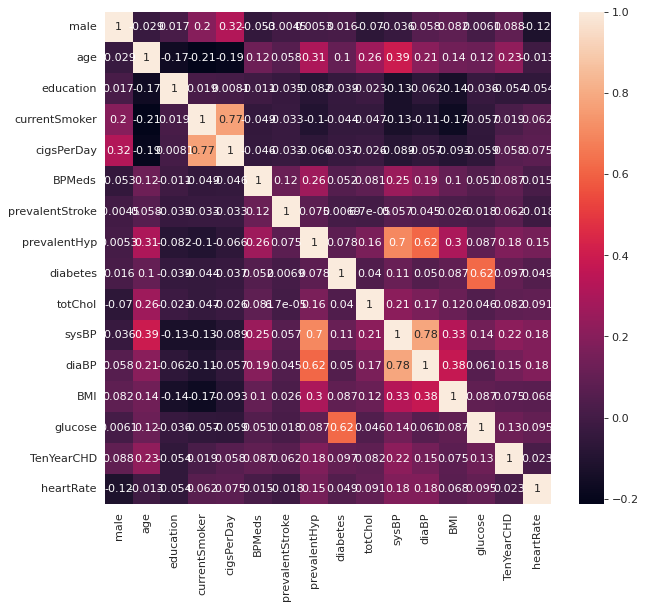

In [86]:
target = 'heartRate'
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1).corr(), annot=True)
plt.show()

In [101]:
X = df1.drop('heartRate', axis=1)
y = df1['heartRate']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [103]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model = clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.1340018231540565

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        45.0       0.00      0.00      0.00         1
        46.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         5
        52.0       0.00      0.00      0.00         6
        53.0       0.00      0.00      0.00         5
        54.0       0.00      0.00      0.00         2
        55.0       0.00      0.00      0.00        10
        56.0       0.00      0.00      0.00         6
        57.0       0.00      0.00      0.00         3
        58.0       0.00      0.00      0.00        10
        60.0       0.00      0.00      0.00        76
        61.0       0.00      0.00      0.00         2
        62.0       0.00      0.00      0.00        18
        63.0       0.00      0.00      0.00        27
        64.0       0.00      0.00      0.00        15
        65.0       0.04    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
